Imports

In [308]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Functions

In [309]:
def crop_barcode(img):
    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Find the horizontal limits of the barcode
    x_min = min([cv.boundingRect(contour)[0] for contour in contours])  # Leftmost x-coordinate
    x_max = max([cv.boundingRect(contour)[0] + cv.boundingRect(contour)[2] for contour in contours])  # Rightmost x-coordinate

    # Assume the largest contour corresponds to the vertical extent of the barcode
    largest_contour = max(contours, key=cv.contourArea)
    _, y, _, h = cv.boundingRect(largest_contour)  # Get the y and height (vertical cropping)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max]
    
    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 2)

    # Draw all contours in red
    contour_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (0, 0, 255), 2)  # Draw all contours in red

    return cropped_img, contour_img

def crop_barcode2(img):

    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Assume the largest contour probably corresponds to a wide bar in the barcode
    largest_contour = max(contours, key=cv.contourArea)
    largest_contour_area = cv.contourArea(largest_contour)

    # Find the horizontal limits of the barcode
    x_min = None
    x_max = None
    for contour in contours:
        contour_area = cv.contourArea(contour)
        if contour_area >= 0.2 * largest_contour_area:  # Check if the contour area is at least 20% of the largest contour
            x, _, w, _ = cv.boundingRect(contour)
            if x_min is None or x < x_min:
                x_min = x
            if x_max is None or x + w > x_max:
                x_max = x + w

    # If no valid contours are found, use the entire width of the image
    if x_min is None or x_max is None:
        x_min = 0
        x_max = img.shape[1]

    # Get the vertical limits from the largest contour
    _, y, _, h = cv.boundingRect(largest_contour)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max]

    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 2)

    # Draw all contours in red
    contour_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (0, 0, 255), 2)  # Draw all contours in red

    return cropped_img, contour_img

def crop_barcode3(img):
    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

    # Assume the largest contour corresponds to the barcode
    largest_contour = max(contours, key=cv.contourArea)
    largest_contour_area = cv.contourArea(largest_contour)

    # Initialize variables to store the leftmost and rightmost contours
    leftmost_contour = None
    rightmost_contour = None
    x_min = float('inf')
    x_max = float('-inf')

    # Find the leftmost and rightmost contours
    for contour in contours:
        contour_area = cv.contourArea(contour)
        if contour_area >= 0.2 * largest_contour_area:  # Check if the contour area is significant
            x, _, w, _ = cv.boundingRect(contour)
            if x < x_min:
                x_min = x
                leftmost_contour = contour
            if x + w > x_max:  # Use x to get the far-right edge of the contour
                x_max = x + w
                rightmost_contour = contour

    x_min, _, _, _ = cv.boundingRect(leftmost_contour)
    x_max, _, w, _ = cv.boundingRect(rightmost_contour)

    # Get the vertical limits from the largest contour
    _, y, _, h = cv.boundingRect(largest_contour)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max+w]

    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 10)

    # Draw all contours in red
    contour_img = cv.cvtColor(cv.bitwise_not(img), cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (255, 0, 0), 4)  # Draw all contours in red

    return cropped_img, contour_img


def display_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [310]:
# Read the image
# img = cv.imread('Samples/image1.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/01 - lol easy.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/02 - still easy.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/03 - eda ya3am ew3a soba3ak mathazarsh.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/04 - fen el nadara.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/05 - meen taffa el nour!!!.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/06 - meen fata7 el nour 333eenaaayy.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/07 - mal7 w felfel.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/08 - compresso espresso.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/09 - e3del el sora ya3ammm.jpg', cv.IMREAD_GRAYSCALE)
img = cv.imread('Samples/Test Cases/10 - wen el kontraastttt.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/11 - bayza 5ales di bsara7a.jpg', cv.IMREAD_GRAYSCALE)



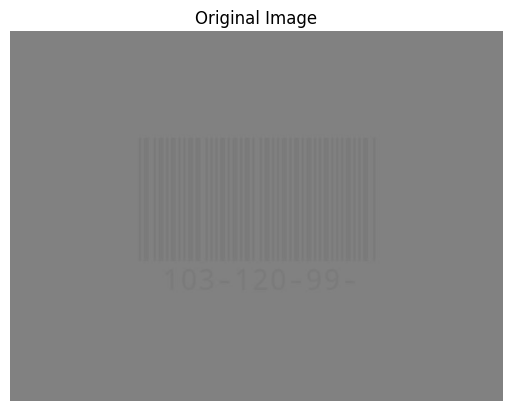

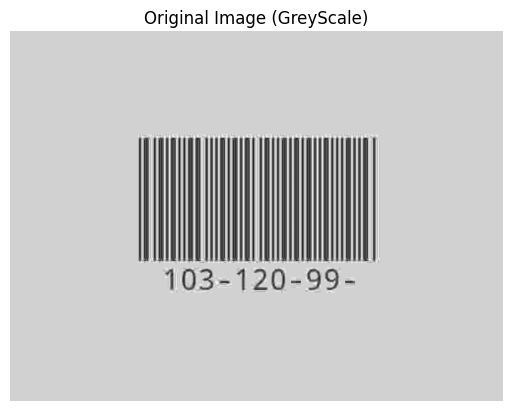

In [311]:
display_image(cv.imread('Samples/Test Cases/10 - wen el kontraastttt.jpg', cv.COLOR_BGR2RGB),'Original Image')
display_image(img,'Original Image (GreyScale)')

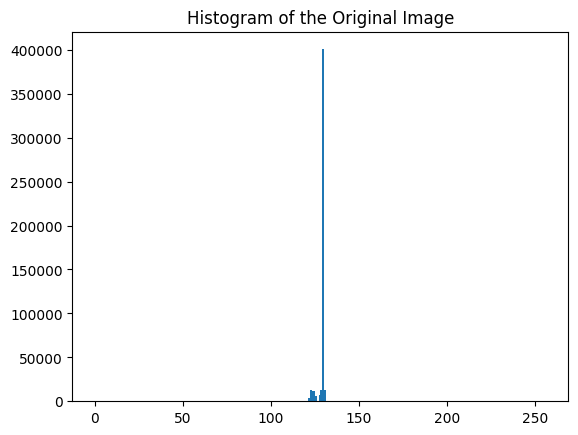

In [312]:
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram of the Original Image')
plt.show()

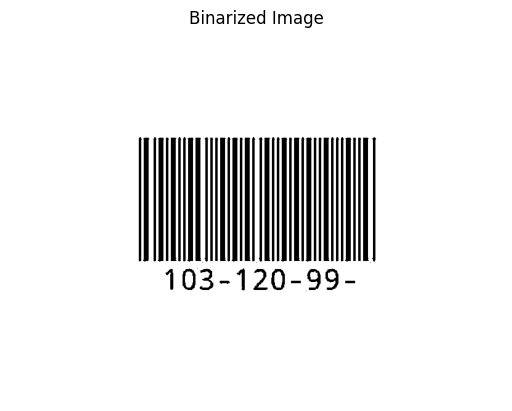

In [313]:
_, binary_barcode = cv.threshold(img, 126, 255, cv.THRESH_BINARY)
display_image(binary_barcode,'Binarized Image')

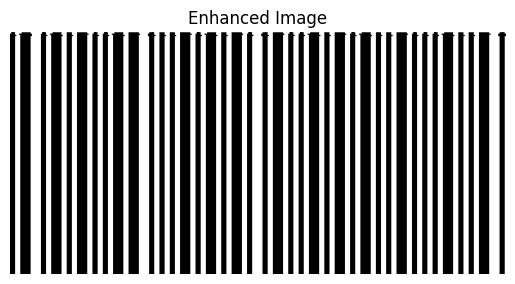

In [314]:
inverted_image = cv.bitwise_not(binary_barcode)
x,y,w,h = cv.boundingRect(inverted_image)
cropped_img = binary_barcode[y:y+h-h//4, x:x+w]
display_image(cropped_img,'Enhanced Image')

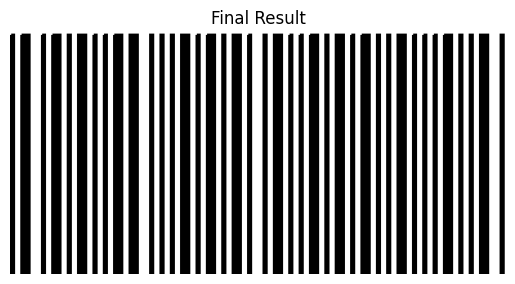

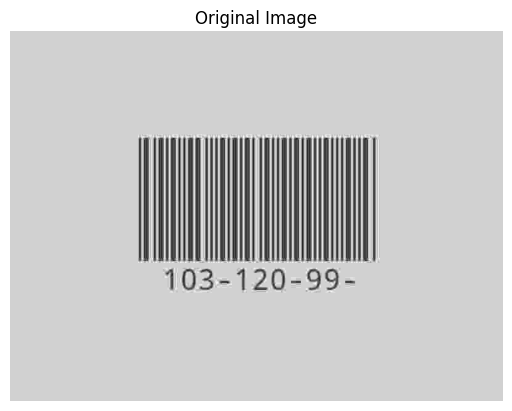

In [316]:

kernel_size = (3, 100)
kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)
closed = cv.morphologyEx(cropped_img, cv.MORPH_CLOSE, kernel)
display_image(closed,'Final Result')
display_image(img,'Original Image')
